In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random

import os
import sys
sys.path.append('../src')

from math_utils import *
from model import *
from utils import *

SEED = 42
np.random.seed(SEED)
random.seed(SEED)

In [3]:
plt.rcParams.update({'font.size': 14, 'axes.labelsize': 14})
plt.rcParams.update({'figure.figsize': (10, 6)})

# QR

## Complexity Analysis

Show that our implementation scale linearly in "m"

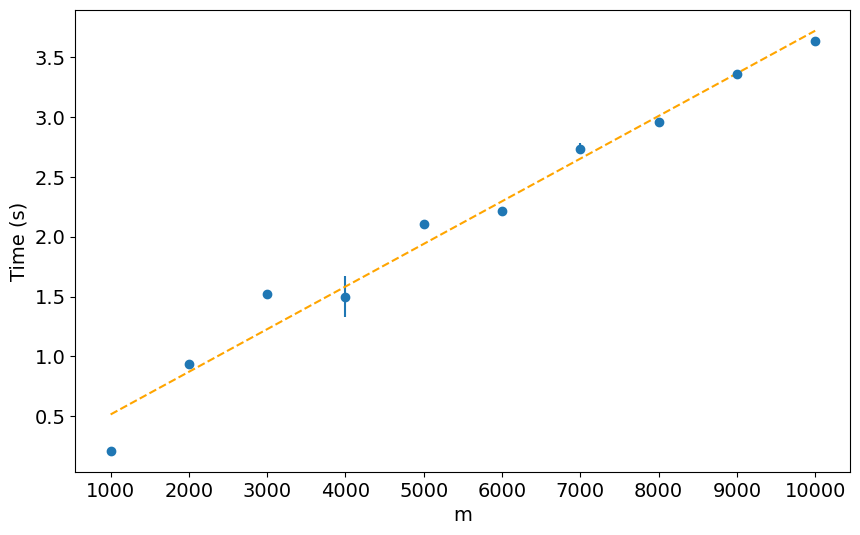

In [3]:
plot_time_mean_variance(n=256, trials=3, START=1000, END=10001, STEP=1000)

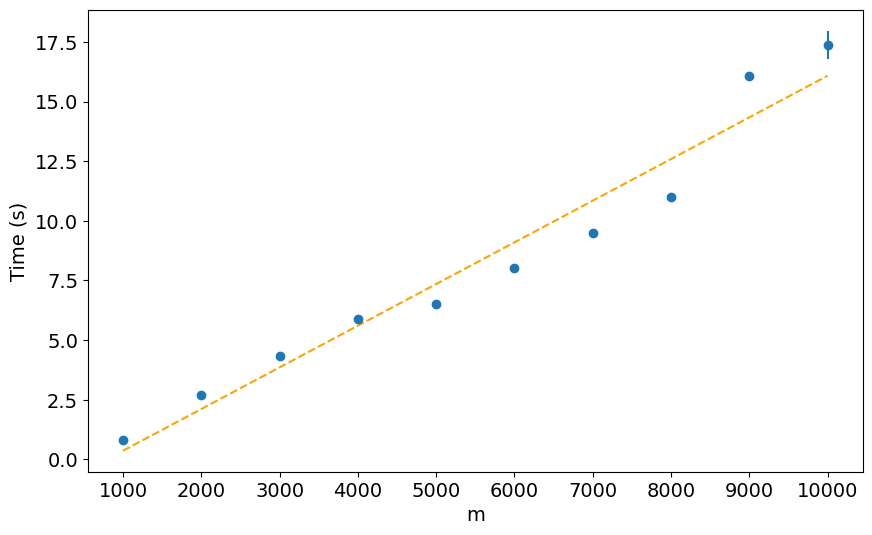

In [4]:
plot_time_mean_variance(n=512, trials=3, START=1000, END=10001, STEP=1000)

## Accuracy Analysis

Show that our implementatio holds the theoretical accuracy/stability analysis. We use an "a posteriori" test exploiting the residual:

$\frac{||X - QR||}{||X||}$

### Uniform X

In [5]:
a, b = -1, 1
num_matrices = 100
END = 5000
MAX_N = 256

n_values = [random.randint(1, MAX_N) for _ in range(num_matrices)]
dimensions = [(random.randint(n + 1, END), n) for n in n_values]
matrices = [np.random.uniform(a, b, size=(m, n)) for m, n in dimensions]

residuals = []

for matrix in matrices:
    residuals.append(residual_QR(matrix))

print(np.mean(residuals), np.var(residuals))


1.2657898583756538e-15 7.817864537600273e-32


### Normal X

In [6]:
loc, scale = 0, 1

n_values = [random.randint(1, MAX_N) for _ in range(num_matrices)]
dimensions = [(random.randint(n + 1, END), n) for n in n_values]
matrices = [np.random.normal(loc, scale, size=(m, n)) for m, n in dimensions]

residuals = []

for matrix in matrices:
    residuals.append(residual_QR(matrix))

print(np.mean(residuals), np.var(residuals))

1.2363673282776625e-15 7.334968042086044e-32


# Least-Square Problem (m $\geq$ n)

## Complexity Analysis

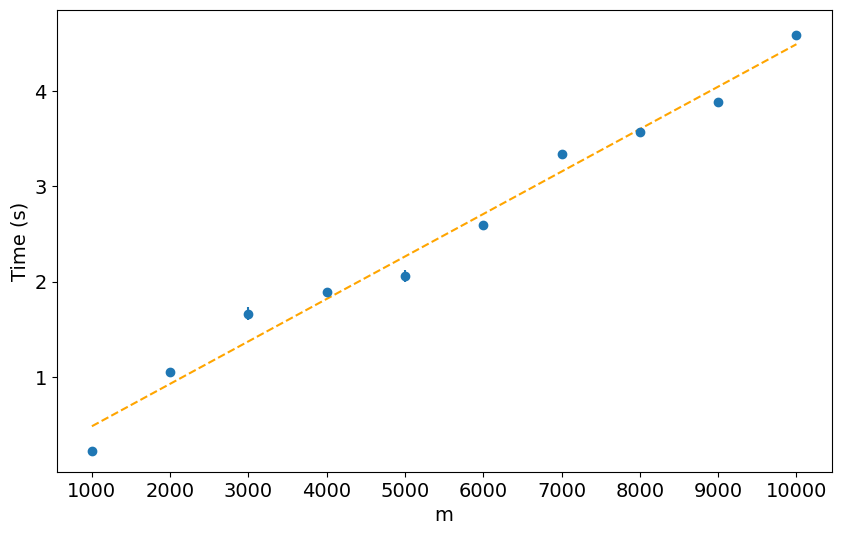

In [4]:
hidden_size = 256
input_size = 10
a, b = -1, 1
START=1000
END=10001
STEP=1000
num_trials = 3

mean_and_variance = []

for num_samples in range(START, END, STEP):
    times = []
    for _ in range(num_trials):
        D = np.random.uniform(a, b, size=(num_samples, input_size)) # dataset
        Y = np.apply_along_axis(lambda x: np.sum(np.sin(x) * np.cos(x)), axis=1, arr=D).reshape(-1, 1)

        model = ELM(input_size, hidden_size)
        start = time.time()
        model.fit(D, Y)
        end = time.time()
        times.append(end - start)
    mean_and_variance.append((np.mean(times), np.var(times)))

plot_errorbar(START, END, STEP, mean_and_variance)


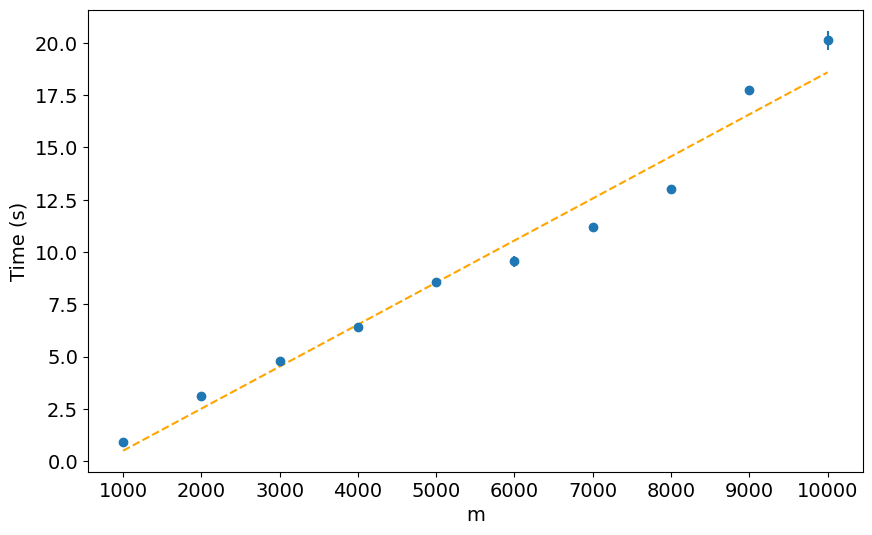

In [5]:
hidden_size = 512
input_size = 10
a, b = -1, 1
START=1000
END=10001
STEP=1000
num_trials = 3

mean_and_variance = []

for num_samples in range(START, END, STEP):
    times = []
    for _ in range(num_trials):
        D = np.random.uniform(a, b, size=(num_samples, input_size)) # dataset
        Y = np.apply_along_axis(lambda x: np.sum(np.sin(x) * np.cos(x)), axis=1, arr=D).reshape(-1, 1)

        model = ELM(input_size, hidden_size)
        start = time.time()
        model.fit(D, Y)
        end = time.time()
        times.append(end - start)
    mean_and_variance.append((np.mean(times), np.var(times)))

plot_errorbar(START, END, STEP, mean_and_variance)

## Accuracy Analysis

### Uniform Weights

In [5]:
alfas = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
a, b = -1, 1
num_matrices = 5
END = 5000
MAX_N = 256

n_values = [random.randint(1, MAX_N) for _ in range(num_matrices)]
dimensions = [(random.randint(n + 1, END), n) for n in n_values]

for ALFA in alfas:
    upper_bounds = []
    cond_numbers = []
    for num_samples, hidden_size in dimensions:
        input_size = 10

        D = np.random.uniform(a, b, size=(num_samples, input_size))
        y = np.apply_along_axis(lambda x: np.sum(np.sin(x) * np.cos(x)), axis=1, arr=D).reshape(-1, 1)

        model = ELM(input_size, hidden_size)
        model.fit(D, y, save_state=True)

        r = model.predict(D) - y
        X = model.X
        m, n = X.shape

        augmented_matrix = np.block([[ALFA * np.eye(m), X],
                                    [X.T, np.zeros((n, n))]])
        
        augmented_matrix_cond = np.linalg.cond(augmented_matrix, p=2)
        
        cond_numbers.append(augmented_matrix_cond)
        upper_bounds.append(np.linalg.cond(augmented_matrix, p=2) * (np.linalg.norm(1/ALFA * (X.T @ r)) / np.linalg.norm(y)))
    
    print(f'ALFA: {ALFA}')
    print(f'Upper bound mean: {np.mean(upper_bounds)} - Upper bound variance: {np.var(upper_bounds)}')
    print(f'Conditional number: {np.mean(cond_numbers)} - Conditional number variance: {np.var(cond_numbers)}')

ALFA: 0.001
Upper bound mean: 8.285077509921837e-06 - Upper bound variance: 6.043652698233605e-11
Conditional number: 97909.04040560145 - Conditional number variance: 2405905458.6856527
ALFA: 0.01
Upper bound mean: 7.177808318864645e-08 - Upper bound variance: 9.752855782855144e-15
Conditional number: 9888.788741289427 - Conditional number variance: 23361023.979119997
ALFA: 0.1
Upper bound mean: 7.311861837091802e-10 - Upper bound variance: 6.344583686990554e-19
Conditional number: 1002.0935304888988 - Conditional number variance: 222431.0937951571
ALFA: 1
Upper bound mean: 6.624405355224498e-12 - Upper bound variance: 2.856977264213971e-23
Conditional number: 102.33867422797749 - Conditional number variance: 1767.8261319998787
ALFA: 10
Upper bound mean: 8.780086989231709e-13 - Upper bound variance: 9.537301619834078e-25
Conditional number: 193.61243216684753 - Conditional number variance: 25564.867038900364
ALFA: 100
Upper bound mean: 1.0775963409750888e-12 - Upper bound variance: 8.4

### Normal Weights

In [7]:
alfas = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
num_matrices = 5
END = 5000
MAX_N = 256

n_values = [random.randint(1, MAX_N) for _ in range(num_matrices)]
dimensions = [(random.randint(n + 1, END), n) for n in n_values]

for ALFA in alfas:
    upper_bounds = []
    cond_numbers = []
    for num_samples, hidden_size in dimensions:
        input_size = 10

        D = np.random.uniform(a, b, size=(num_samples, input_size))
        y = np.apply_along_axis(lambda x: np.sum(np.sin(x) * np.cos(x)), axis=1, arr=D).reshape(-1, 1)

        model = ELM(input_size, hidden_size, init_method='normal')
        model.fit(D, y, save_state=True)

        r = model.predict(D) - y
        X = model.X
        m, n = X.shape

        augmented_matrix = np.block([[ALFA * np.eye(m), X],
                                    [X.T, np.zeros((n, n))]])
        
        augmented_matrix_cond = np.linalg.cond(augmented_matrix, p=2)
        
        cond_numbers.append(augmented_matrix_cond)
        upper_bounds.append(np.linalg.cond(augmented_matrix, p=2) * (np.linalg.norm(1/ALFA * (X.T @ r)) / np.linalg.norm(y)))
    
    print(f'ALFA: {ALFA}')
    print(f'Upper bound mean: {np.mean(upper_bounds)} - Upper bound variance: {np.var(upper_bounds)}')
    print(f'Conditional number: {np.mean(cond_numbers)} - Conditional number variance: {np.var(cond_numbers)}')

ALFA: 0.001
Upper bound mean: 2.119369873117977e-05 - Upper bound variance: 1.6650922835449135e-10
Conditional number: 296952.02230321214 - Conditional number variance: 9176671169.216955
ALFA: 0.01
Upper bound mean: 1.8296872805539997e-07 - Upper bound variance: 1.885875037114107e-14
Conditional number: 29544.56080474362 - Conditional number variance: 78103621.6399879
ALFA: 0.1
Upper bound mean: 1.7798349226869875e-09 - Upper bound variance: 3.546148017994586e-18
Conditional number: 2955.756539858001 - Conditional number variance: 711383.4830339424
ALFA: 1
Upper bound mean: 2.3113873916370404e-11 - Upper bound variance: 5.609254029507993e-22
Conditional number: 293.1602378908653 - Conditional number variance: 8699.084503740243
ALFA: 10
Upper bound mean: 1.3634525669308045e-12 - Upper bound variance: 2.871377760861085e-24
Conditional number: 226.1317436852215 - Conditional number variance: 23354.07280585012
ALFA: 100
Upper bound mean: 3.1262982080428018e-12 - Upper bound variance: 2.717

# Least-Square Problem (m < n)

## Complexity Analysis

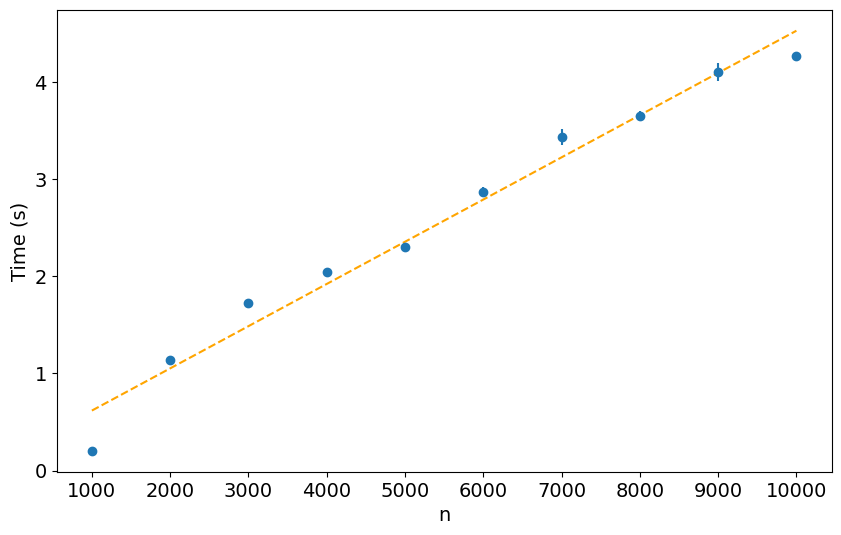

In [6]:
num_samples = 256
input_size = 10
a, b = -1, 1
START=1000
END=10001
STEP=1000
num_trials = 3

mean_and_variance = []

for hidden_size in range(START, END, STEP):
    times = []
    for _ in range(num_trials):
        D = np.random.uniform(a, b, size=(num_samples, input_size)) # dataset
        Y = np.apply_along_axis(lambda x: np.sum(np.sin(x) * np.cos(x)), axis=1, arr=D).reshape(-1, 1)

        model = ELM(input_size, hidden_size)
        start = time.time()
        model.fit(D, Y)
        end = time.time()
        times.append(end - start)
    mean_and_variance.append((np.mean(times), np.var(times)))

plot_errorbar(START, END, STEP, mean_and_variance, xlabel='n')


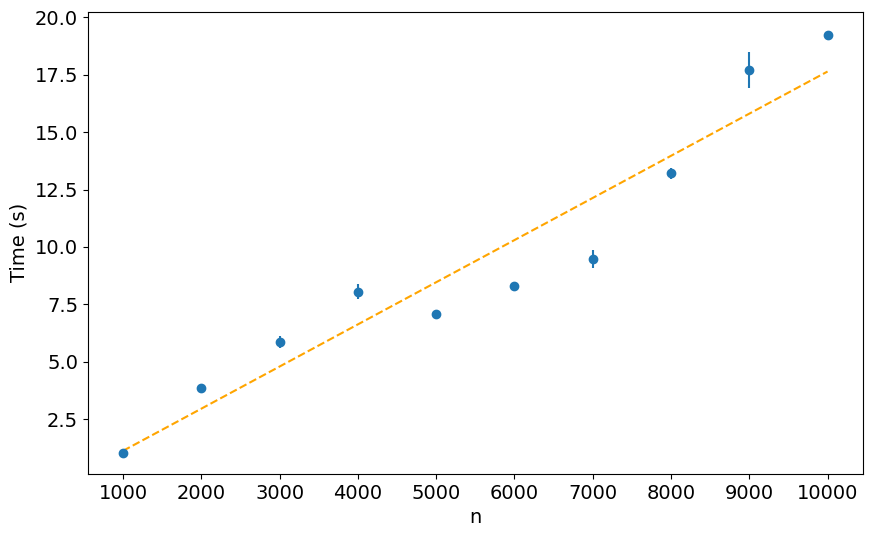

In [7]:
num_samples = 512
input_size = 10
a, b = -1, 1
START=1000
END=10001
STEP=1000
num_trials = 3

mean_and_variance = []

for hidden_size in range(START, END, STEP):
    times = []
    for _ in range(num_trials):
        D = np.random.uniform(a, b, size=(num_samples, input_size)) # dataset
        Y = np.apply_along_axis(lambda x: np.sum(np.sin(x) * np.cos(x)), axis=1, arr=D).reshape(-1, 1)

        model = ELM(input_size, hidden_size)
        start = time.time()
        model.fit(D, Y)
        end = time.time()
        times.append(end - start)
    mean_and_variance.append((np.mean(times), np.var(times)))

plot_errorbar(START, END, STEP, mean_and_variance, xlabel='n')

## Accuracy Analysis

In [ ]:
a, b = -1, 1

input_size, hidden_size = 10, 1000
num_samples = 512

D = np.random.uniform(a, b, size=(num_samples, input_size))
y = np.apply_along_axis(lambda x: np.sum(np.sin(x) * np.cos(x)), axis=1, arr=D).reshape(-1, 1)

model = ELM(input_size, hidden_size)
model.fit(D, y, save_state=True)

r = model.predict(D) - y
X = model.X
m, n = X.shape

upper_bound = np.linalg.cond(X, p=2) * (np.linalg.norm(r) / np.linalg.norm(y))
print(f'Upper bound: {upper_bound}')
print(f'Conditional number: {np.linalg.cond(X, p=2)}')

Upper bound: 7.666157095555771e-13
Conditional number: 558.4499821465793
